In [1]:
import ftm
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import time


getsounds_imp is the impulse implementation

getsounds_dif is the impulse-invariant implementation (difference eq version)

In [8]:
w11=200 * 2 * np.pi #range 200hz-1200hz
tau11 = 0.09 #range 0.01-0.3
p = 0.3 #how round the sound is, smaller the rougher(metal), range 0-0.3
D = 0.3 #inharmonicity in smaller values, range 0-10
alpha = 1 #range 0-5
sr = 44100
start_time = time.time()
y = ftm.getsounds_imp(10,10,w11,tau11,p,D,alpha,sr)
print("--- %s seconds ---" % (time.time() - start_time))
ipd.Audio(y,rate=sr)

--- 1.3324270248413086 seconds ---


In [9]:
start_time = time.time()
y_dif = ftm.getsounds_dif(10,10,w11,tau11,p,D,alpha,sr)
print("--- %s seconds ---" % (time.time() - start_time))
ipd.Audio(y_dif,rate=sr)

--- 1.9295380115509033 seconds ---


In [4]:
np.sum(np.array(y)-np.array(y_dif))

5.040029325642461e-17

problems:
1. these synthesis yield really small values, ipd normalizes it automatically, but c++ does not
2. impulse implementation is faster than difference implementation, why
3. two implementations yield slightly different sounds, dif version is sharper.

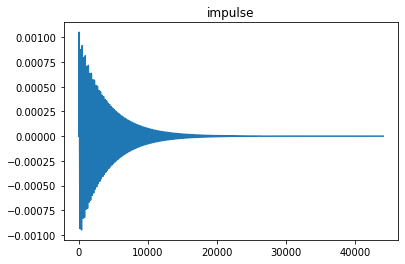

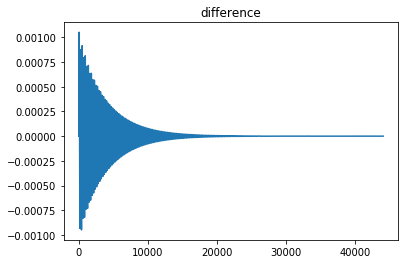

In [7]:
plt.plot(range(len(y)),y)
plt.title('impulse')
plt.figure(2)
plt.plot(range(len(y_dif)),y_dif)
plt.title('difference')
plt.show()